In [2]:
import numpy as np 
import pandas as pd
import statistics as stats
import math

data = pd.read_excel('proshares_analysis_data.xlsx', sheet_name='hedge_fund_series', usecols="B:F")
data = data.to_numpy()
data = np.transpose(data)
names = ["HFRIFWI Index", "MLEIFCTR Index", "MLEIFCTX Index", "HDG US Equity", "QAI US Equity"]
counter = 0
returns = np.empty(5)
volatilities = np.empty(5)
dates = pd.read_excel('proshares_analysis_data.xlsx', sheet_name='hedge_fund_series', usecols="A", dtype="string")
dates = dates.to_numpy()
dates = np.transpose(dates)
dates = dates[0]
for column in data:
    mean_return = 12*stats.mean(column)
    volitality = math.sqrt(12)*stats.stdev(column)
    sharpe_ratio = mean_return / volitality
    returns[counter] = mean_return
    volatilities[counter] = volitality 
    print(names[counter] + " Mean Return: " + str(round(mean_return,4)) + " Volitality: " + str(round(volitality,4)) + " Sharpe Ratio: " + str(round(sharpe_ratio, 4)))
    counter += 1

HFRIFWI Index Mean Return: 0.0414 Volitality: 0.0604 Sharpe Ratio: 0.686
MLEIFCTR Index Mean Return: 0.0307 Volitality: 0.0571 Sharpe Ratio: 0.5367
MLEIFCTX Index Mean Return: 0.0292 Volitality: 0.057 Sharpe Ratio: 0.5131
HDG US Equity Mean Return: 0.0194 Volitality: 0.0596 Sharpe Ratio: 0.3263
QAI US Equity Mean Return: 0.017 Volitality: 0.0499 Sharpe Ratio: 0.3399


HFRIFWI Index Skew: -0.9687 Kurtosis: 5.7055 VaR: -0.0062 CVaR: -0.0204
MLEIFCTR Index Skew: -0.2424 Kurtosis: 1.5888 VaR: -0.0061 CVaR: -0.0213
MLEIFCTX Index Skew: -0.2286 Kurtosis: 1.5581 VaR: -0.0064 CVaR: -0.0213
HDG US Equity Skew: -0.2314 Kurtosis: 1.6944 VaR: -0.0088 CVaR: -0.0231
QAI US Equity Skew: -0.4565 Kurtosis: 1.7204 VaR: -0.0085 CVaR: -0.0185


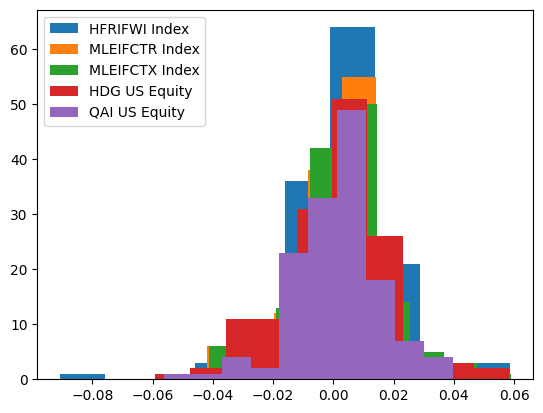

In [3]:
import scipy 
import matplotlib.pyplot as plt

counter = 0
for column in data:
    skew = scipy.stats.skew(column)
    kurtosis = scipy.stats.kurtosis(column)
    `
    total = 0
    CVaR = stats.mean(column[column < VaR])
    print(names[counter] + " Skew: " + str(round(skew,4)) + " Kurtosis: " + str(round(kurtosis,4)) + 
" VaR: " + str(round(VaR,4)) + " CVaR: " + str(round(CVaR,4)))
    #plt.figure()
    plt.hist(column, label=names[counter], fill='False')
    counter += 1

plt.legend(loc="upper left")

In [10]:
#Max Drawdown: 
counter = 0
for column in data:
    start = -1; 
    end = -1;
    recovery = -1; 
    maxDrawdown = 0
    cumprod = (1+column).cumprod()
    #print(cumprod)
    #I'm sure we can make this 10x more efficent but not necessary
    i = 0
    j = 0
    k = 0
    for i in range(142):
        for j in range(142 - i):
            if(-((cumprod[i] - cumprod[j + i]) / cumprod[i]) < maxDrawdown):
                maxDrawdown = -100*((cumprod[i] - cumprod[j + i]) / cumprod[i])
                start = i
                end = j + i
                for k in range(142 - j - i):
                    if(cumprod[i] < cumprod[i + j + k]):
                        recovery = i + j + k
                        break
    print(names[counter] + " max drawdown: " + str(maxDrawdown) + "%")
    print("Start: " + dates[start] + " " + str(cumprod[start]))
    print("End: " + dates[end] + " " + str(cumprod[end]))
    print("Recovery: " + dates[recovery] + " " + str(cumprod[recovery]))
    print(" ")
    counter += 1

HFRIFWI Index max drawdown: -3.8903268312963797%
Start: 2011-08-31 00:00:00 0.9678514372850415
End: 2011-09-30 00:00:00 0.9301988531332539
Recovery: 2012-02-29 00:00:00 0.9840251203812839
 
MLEIFCTR Index max drawdown: -3.24142979138709%
Start: 2011-08-31 00:00:00 0.9744123153734138
End: 2011-09-30 00:00:00 0.9428274242919552
Recovery: 2011-10-31 00:00:00 0.9839281999465067
 
MLEIFCTX Index max drawdown: -3.2592758967064115%
Start: 2011-08-31 00:00:00 0.974311123538816
End: 2011-09-30 00:00:00 0.9425556359303859
Recovery: 2011-10-31 00:00:00 0.9833867251849465
 
HDG US Equity max drawdown: -3.2466412946422696%
Start: 2011-08-31 00:00:00 0.9729654619881577
End: 2011-09-30 00:00:00 0.9413767635166432
Recovery: 2011-10-31 00:00:00 0.9889463340134949
 
QAI US Equity max drawdown: -2.2141560798548157%
Start: 2011-08-31 00:00:00 0.9935088351965381
End: 2011-09-30 00:00:00 0.9715109989181392
Recovery: 2011-10-31 00:00:00 0.996033177064551
 


In [5]:
from sklearn.linear_model import LinearRegression

merrill_factors = pd.read_excel('proshares_analysis_data.xlsx', sheet_name='merrill_factors', usecols="B:G")
merrill_factors = merrill_factors.to_numpy()
merrill_factors = np.transpose(merrill_factors)
names2 = ["SPY US Equity", "USGG3M Index", "EEM US Equity", "EFA US Equity", "EUO US Equity", "IWM US Equity"]
counter = 0
IRs = np.empty(5)
for column in data:
    model = LinearRegression().fit(merrill_factors[0].reshape(-1,1),column.reshape(-1,1))
    Beta = model.coef_
    Beta = Beta[0][0]
    TR = returns[counter]/Beta
    IR = model.intercept_[0] / volatilities[counter]
    IRs[counter] = IR
    print(names[counter] + " Beta: " + str(round(Beta,4)) + " TR: " + str(round(TR,4)) + " IR: " + str(round(IR,4)))
    counter += 1

HFRIFWI Index Beta: 0.3482 TR: 0.119 IR: -0.0049
MLEIFCTR Index Beta: 0.3499 TR: 0.0877 IR: -0.0212
MLEIFCTX Index Beta: 0.3485 TR: 0.0839 IR: -0.0231
HDG US Equity Beta: 0.3595 TR: 0.0541 IR: -0.0378
QAI US Equity Beta: 0.2941 TR: 0.0577 IR: -0.0352


4: Relative Performance:
A. All of the hedge funds have a beta of 0.29-0.36 meaning that they have relatively low exposure to the market. They all have positive returns since they are related to the overall market but have negative alphas meaning they lose return. 
B. HDG has a higher beta meaning that it has higher exposure to the market. In addition, it has a lower Treynor Ratio and lower Information ratio meaning that in every aspect it performs worse. 
C. No? 

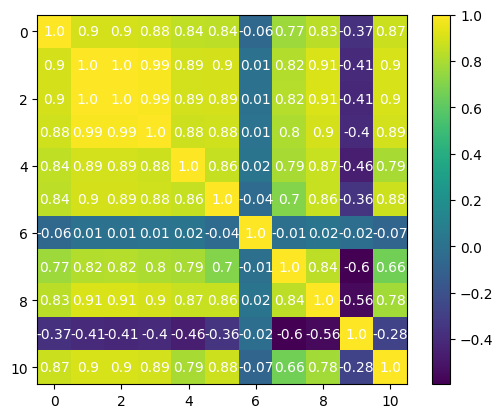

In [6]:
corr = np.corrcoef(data,merrill_factors)
plt.imshow(corr)
plt.colorbar()

for i in range(11):
    for j in range(11):
        plt.annotate(str(round(corr[i][j], 2)), xy=(i, j),
                     ha='center', va='center', color='white')

In [11]:
counter = 0
for column in data:
    model = LinearRegression().fit(merrill_factors.transpose(),column.reshape(-1,1))
    print(names[counter] + " Alpha: " + str(round(model.intercept_[0]*12,5)))
    counter2 = 0
    for coef in model.coef_[0]:
        print("   " + names2[counter2] + " BETA " + str(round(coef,3)))
        counter2 += 1
    print("   R^2 " + str(round(model.score(merrill_factors.transpose(),column.reshape(-1,1)),4)))
    print("")
    counter += 1

HFRIFWI Index Alpha: 0.01779
   SPY US Equity BETA 0.03
   USGG3M Index BETA -0.371
   EEM US Equity BETA 0.079
   EFA US Equity BETA 0.084
   EUO US Equity BETA 0.023
   IWM US Equity BETA 0.153
   R^2 0.8361

MLEIFCTR Index Alpha: -0.00142
   SPY US Equity BETA 0.028
   USGG3M Index BETA 0.622
   EEM US Equity BETA 0.067
   EFA US Equity BETA 0.136
   EUO US Equity BETA 0.027
   IWM US Equity BETA 0.126
   R^2 0.9392

MLEIFCTX Index Alpha: -0.00235
   SPY US Equity BETA 0.027
   USGG3M Index BETA 0.592
   EEM US Equity BETA 0.068
   EFA US Equity BETA 0.137
   EUO US Equity BETA 0.027
   IWM US Equity BETA 0.125
   R^2 0.9385

HDG US Equity Alpha: -0.01375
   SPY US Equity BETA 0.025
   USGG3M Index BETA 0.679
   EEM US Equity BETA 0.063
   EFA US Equity BETA 0.142
   EUO US Equity BETA 0.025
   IWM US Equity BETA 0.135
   R^2 0.9122

QAI US Equity Alpha: -0.01328
   SPY US Equity BETA 0.139
   USGG3M Index BETA 0.584
   EEM US Equity BETA 0.064
   EFA US Equity BETA 0.07
   EUO US E

The individual betas are very high (as high as 0.5) but we can adjust them for the volitality of the underlying asset since Beta times Volitality tells us our actual exposure to the asset and we can see that when we standardize by volitality the numbers are much closer to eachother

In [12]:
counter = 0
index_vols = np.empty(6)
index_counter = 0
for index in merrill_factors:
    index_vols[index_counter] = stats.stdev(index)
    index_counter += 1

for column in data:
    model = LinearRegression().fit(merrill_factors.transpose(),column.reshape(-1,1))
    print(names[counter])
    counter2 = 0
    for coef in model.coef_[0]:
        betaXvol = coef*index_vols[counter2]
        print("   " + names2[counter2] + " BetaXVol " + str(round(betaXvol,4)))
        counter2 += 1
    print(" ")
    counter += 1

HFRIFWI Index
   SPY US Equity BetaXVol 0.0013
   USGG3M Index BetaXVol -0.0004
   EEM US Equity BetaXVol 0.0042
   EFA US Equity BetaXVol 0.0038
   EUO US Equity BetaXVol 0.0011
   IWM US Equity BetaXVol 0.0086
 
MLEIFCTR Index
   SPY US Equity BetaXVol 0.0012
   USGG3M Index BetaXVol 0.0006
   EEM US Equity BetaXVol 0.0036
   EFA US Equity BetaXVol 0.0061
   EUO US Equity BetaXVol 0.0012
   IWM US Equity BetaXVol 0.0071
 
MLEIFCTX Index
   SPY US Equity BetaXVol 0.0011
   USGG3M Index BetaXVol 0.0006
   EEM US Equity BetaXVol 0.0036
   EFA US Equity BetaXVol 0.0062
   EUO US Equity BetaXVol 0.0012
   IWM US Equity BetaXVol 0.007
 
HDG US Equity
   SPY US Equity BetaXVol 0.0011
   USGG3M Index BetaXVol 0.0007
   EEM US Equity BetaXVol 0.0034
   EFA US Equity BetaXVol 0.0064
   EUO US Equity BetaXVol 0.0012
   IWM US Equity BetaXVol 0.0076
 
QAI US Equity
   SPY US Equity BetaXVol 0.0058
   USGG3M Index BetaXVol 0.0006
   EEM US Equity BetaXVol 0.0035
   EFA US Equity BetaXVol 0.0031
 

In [9]:
counter = 0

for column in data:
    model = LinearRegression().fit(merrill_factors.transpose(),column.reshape(-1,1))
    error_vol = str(round(model.intercept_[0]*100/IRs[counter], 4))
    print(names[counter] + " " + error_vol + "%")
    counter += 1

HFRIFWI Index -30.2057%
MLEIFCTR Index 0.5575%
MLEIFCTX Index 0.8471%
HDG US Equity 3.0313%
QAI US Equity 3.1485%
